In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
path = os.getcwd()
os.chdir("../part_1_data_collect/polina")
df = pd.read_excel(f'{os.getcwd()}/final_df.xlsx')

In [3]:
df = df.drop(columns= 'Unnamed: 0') # удаление столбца со старыми индексами

In [5]:
# перезадавание значений столбца "cast" путем отбора пятёрки главных актеров фильма
df['cast'] = df.cast.str.split(',').str[1:6].apply(lambda x: ','.join(x)) 

# определение количества языков, на которых был выпущен фильм
df['lang_cnt'] = df.languages.str.split(',').apply(lambda x: len(x))  

# определение количества стран, участвовавших в создании фильма
df['country_cnt'] = df.country_of_origin.str.split(',').apply(lambda x: len(x))  

# проверка на ко-продукцию (выпуск фильма при участии нескольких стран)
df['coproduction'] = df.country_cnt > 1  
df['coproduction'] = df.coproduction.astype(int)

In [6]:
df.shape # узнаем размер итогового датафрейма
df.columns # узнаем, какие поля содержатся в датафейме
df.info() # проверка на наличие пропусков в датафрейме и вывод типов данных, содержащихся в соответствующих столбцах

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1455 entries, 0 to 1454
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              1455 non-null   object 
 1   average_rating     1455 non-null   float64
 2   director           1455 non-null   object 
 3   writer             1455 non-null   object 
 4   metascore          1455 non-null   int64  
 5   cast               1455 non-null   object 
 6   country_of_origin  1455 non-null   object 
 7   languages          1455 non-null   object 
 8   runtime            1455 non-null   int64  
 9   genre              1455 non-null   object 
 10  budget             1455 non-null   int64  
 11  worldwide_gross    1455 non-null   int64  
 12  release_year       1455 non-null   int64  
 13  profit_or_loss     1455 non-null   int64  
 14  p&l_rate           1455 non-null   float64
 15  lang_cnt           1455 non-null   int64  
 16  country_cnt        1455 

Итоговый датафрейм содержит 1455 наблюдений с данными по 17 признакам:  

**title** - Наименование фильма (категориальный, номинальный);\
**average_rating** - Усредненный рейтинг IMDb (числовой, непрерывный);\
**director** - Режиссер (категориальный, номинальный);\
**writer** - Сценарист (категориальный, номинальный);\
**metascore** - Оценки из Metacritic (числовой, непрерывный);\
**cast** - Ключевые актеры (категориальный, номинальный);\
**country_of_origin** - Страна происхождения (категориальный, номинальный);\
**languages** - Языки (категориальный, номинальный);\
**runtime** - Длительность (числовой, дискретный);\
**genre** - Жанр (категориальный, номинальный);\
**budget** - Бюджет (числовой, дискретный);\
**worldwide_gross** - Кассовые сборы (числовой, дискретный);\
**release_year** - Дата выхода (числовой, дискретный);\
**profit_or_loss** - Прибыль/убыток (числовой, дискретный);\
**p&l_rate** - Отношение прибыли/убытка к бюджету фильма (числовой, непрерывный);\
**lang_cnt** - Количество официальных языков перевода фильма (числовой, дискретный);\
**country_cnt** - Количество стран-продюсеров, задействованных в съемке фильма (числовой, дискретный);\
**coproduction** - Фактор ко-продукции, снято при поддержке нескольких стран или одной (категориальная, бинарная);

Пропущенные значения в датафрейме отсутствуют, содержащиеся данные в полях приведены к соответствующему типу данных

In [7]:
# определение описательных характеристик для числовых признаков датафрейма
df.describe()  

,average_rating,metascore,runtime,budget,worldwide_gross,release_year,profit_or_loss,p&l_rate,lang_cnt,country_cnt,coproduction
count,1455.000000,1455.000000,1455.000000,1.455000e+03,1.455000e+03,1455.000000,1.455000e+03,1455.000000,1455.000000,1455.000000,1455.000000
mean,7.609759,73.377320,121.134021,3.078353e+07,1.275457e+08,1997.533333,9.676220e+07,474.996893,1.957388,1.674227,0.399313
std,0.357549,12.526666,24.259159,4.636157e+07,2.474767e+08,21.534434,2.125636e+08,1606.678629,1.293130,1.122357,0.489926
min,7.200000,25.000000,2.000000,2.500000e+03,1.900000e+01,1920.000000,-1.580311e+08,-100.000000,1.000000,1.000000,0.000000
25%,7.300000,66.000000,105.000000,3.600000e+06,5.651243e+06,1986.500000,-5.185755e+05,-22.655000,1.000000,1.000000,0.000000
50%,7.500000,73.000000,119.000000,1.400000e+07,3.469875e+07,2004.000000,1.893600e+07,150.300000,2.000000,1.000000,0.000000
75%,7.800000,82.000000,134.000000,3.500000e+07,1.268048e+08,2014.000000,9.339614e+07,446.715000,2.000000,2.000000,1.000000
max,9.300000,100.000000,271.000000,3.551000e+08,2.923706e+09,2024.000000,2.686706e+09,31662.700000,10.000000,11.000000,1.000000


На основании рассчитанной описательной статистики можно сделать следующие выводы:

**- Для признака "average_rating"**\
Минимальный рейтинг фильма в датасете составляет 7.2, что позволяет предположить, что зрители довольно лояльны при выставлении
оценки фильму и не используют всю полноту оценочной шкалы от 0 до 10. Максимальный рейтинг достигает 9.3 баллов и доказывает факт того, что в датафрейме отсутствует фильм, который бы нравился всем зрителям без исключения и имел идеально высокую оценку в 9,8 - 10 баллов.

**- Для признака "metascore"**\
Оценки критиков являются более вариативными - от 25 до 100 баллов (от 2.5 до 10 баллов в нормированной шкале), однако в среднем примерно равны среднему рейтингу фильмов (7,6 рейтинговых баллов ~= нормированному баллу в 7.3). Стандартное отклонение оценки 
составляет 12,5 баллов, следовательно критическая оценка около 99,7 % наблюдений в датафрейме лежит в диапазоне (35.78; 100)

**- Для признака "runtime"**\
Средняя продолжительность фильмов составляет 121 минуту (~ 2 часа) и колеблется для 99,7 % фильмов от 48 до 194 минут. В получившемся датасете присутствуют аномальные значения длительности: минимальное время кинокартины составляет 2 минуты, и скорее является короткометражным фильмов, чем среднестатистическим фильмом; максимальное время в 271 минуту свидетельствует о наличии в датафрейме образцов авторского кино, для которых характерна подобная длительность.

**- Для признаков "budget" и "worldwide_gross"**\
Показатель суммы денежных средств, потраченных на продюсирование и съемки фильма, имеет очень большое стандартное отклонение и указывает на высокую вариативность бюджетов рассматриваемых фильмов: тот же вывод справедлив и для кассовых сборов. Представленные данные также позволяют сделать вывод, что минимальная сумма бюджета фильма в датасете равна 2 500 долларов, а максимальная - 355 100 000 долларов. В отношении кассовых сборов наблюдается иная, более флуктуационная статистика: минимальный размер собранных средств составляет 19 долларов (что может являться справедливым для авторского кино, не предназначенного для широкой публики), а максимальный 2 923 706 000 долларов. Также полученные данные указывают на отсутствие ошибок в датафрейме: отрицательных или нулевых значений по данным признакам выявлено не было.

**- Для признака "release_year"**\
Датасет отражает инфомацию о фильмах, выпущенных в прокат с 1920 года по 2024 год, за 104-летний период развития отрасли кино.
Около 50% всех наблюдений датированы годом от 1920 до 2004, а оставшая часть наблюдений - от 2004 до 2024 годов. Подобное наблюдение позволяет сделать несколько предположений о причинах полученных статистических результатов:\
1) Киноиндустрия стала быстрее развиваться с наступлением нулевых годов: количество снимаемых фильмов кратно увеличилось.\
2) Во второй половине 20-го века процесс сборки данных был менее доступным и оптимизированным в сравнении с его характеристикой в последние 20 лет

**- Для признаков "profit_or_loss" и "p&l_rate"**\
Указанные признаки отражают прибыль/убыток, полученные от выпуска фильма, и отношение прибыли/убытка к вложенным в фильм средствам (т.е. бюджету) соответственно. Значения описательной статистики констатитуруют факт того, что не все фильмы оказались успешными и окупились, однако более 50% фильмов удалось получить чистую прибыль, превышающую вложения в минимум 4 раза


**- Для признака "lang_cnt"**\
Среднее количество официальных языков перевода для фильмов составляет два. Минимальное число языков, на которых выпущен фильм, равно стандартному одному, а максимальное - 10 языкам.

**- Для признака "country_cnt"**\
Cоответствующий признак отражает количество стран-продюсеров: для более 50% наблюдений оно составляет одну страну, что делает релевантным вывод о том, что практика съемки фильма в нескольких странах является скорее редкой, чем обыденной. Наибольшее количество стран, участвовавших в съемке фильма, составляет 11 стран.

**- Для признака "coproduction"**\
Фактор ко-продукции является более информативным бинарным показателем, рассчитанным на основании предыдущего. Он показывает, был ли снят фильм исключительно в одной стране или в нескольких. Результаты описательной статистики свидетельствуют о том, что абсолютное большинство фильмов, представленных в датасете, - результат производства кино-команд одной страны.



In [38]:
# определение описательных характеристик для категориальных признаков датафрейма
df[['director', 'writer', 'country_of_origin', 'languages', 'genre']].describe(include = 'object') 

,director,writer,country_of_origin,languages,genre
count,1455,1455,1455,1455,1455
unique,716,1321,290,390,249
top,Steven Spielberg,Woody Allen,United States,English,Drama
freq,22,12,779,665,89


Описательная характеристика, рассчитанная для категориальных признаков не обладает высокой степенью информативности в сравнении с статистикой для числовых признаков по причине содержания в ячейках признаков сразу нескольких значений, однако все же позволяет сделать некоторые выводы: 

- Самым часто встречающимся режиссером среди рассматриваемых фильмов является Стивен Спилберг, известный своей обширной кино биографией, а самым часто встречающимся сценаристом - Вуди Аллен - знаменитый американский сценарист и автор многочисленных рассказов и пьес

- Большинство фильмов снято в США, а наиболее часто используемый язык фильмов - английский - первый язык в мире по количеству носителей 

- Наиболее популярный жанр в рассматриваемых фильмах - драма

In [71]:
# определение столбцов с числовым типом данных для дальнейшего построения графиков распределения
int_col = list(df.select_dtypes(include = ['int64', 'float64']).columns) 
int_col

['average_rating',
 'metascore',
 'runtime',
 'budget',
 'worldwide_gross',
 'release_year',
 'profit_or_loss',
 'p&l_rate',
 'lang_cnt',
 'country_cnt',
 'coproduction']

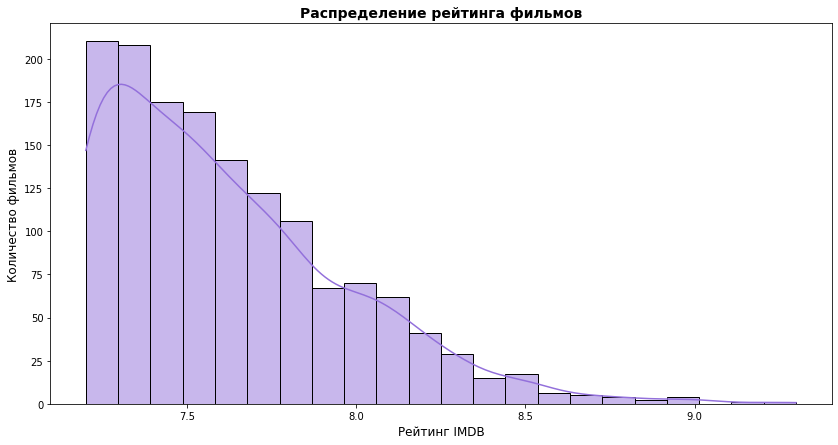

In [40]:
# построение гистограммы распределения для признака "average_rating"
plt.figure(figsize = (14, 7))
sns.histplot(x = df.average_rating, bins = 22, color = 'mediumpurple', kde = True)
plt.title('Распределение рейтинга фильмов', fontweight = 'bold', fontsize = 14)
plt.ylabel('Количество фильмов', fontsize = 12)
plt.xlabel('Рейтинг IMDB', fontsize = 12)
plt.show()

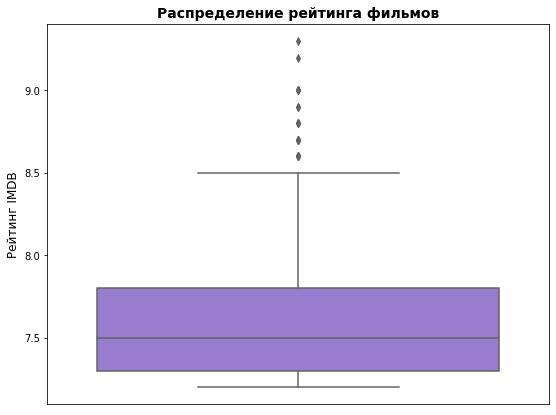

In [41]:
# построение графика "ящик с усами" для признака "average_rating"
plt.figure(figsize = (9, 7))
sns.boxplot(y = df.average_rating, color = 'mediumpurple')
plt.title('Распределение рейтинга фильмов', fontweight = 'bold', fontsize = 14)
plt.ylabel('Рейтинг IMDB', fontsize = 12)
plt.xlabel('')
plt.xticks([])
plt.show()

Получившиеся графики позволяют сделать следующие выводы:
 - Наиболее популярный рейтинговый диапазон для рассматриваемых фильмов — (7.3, 7.8), так как общее количество фильмов с этими промежуточными оценками максимально (близко к 210)
 - Рейтинг 9.0 и выше встречается реже, что может указывать на то, что фильмы с такой высокой оценкой являются исключительными
 - 50% рассматриваемых фильмов имеет рейтинговую оценку от 7.3 до 7.5, а 75% рассматриваемых фильмов имеет рейтинговую оценку от 7.3 до 7.8
 - Рейтинговые оценки сосредоточены вокруг высоких значений (7.5–9.0), что может указывать на то, что выборка состоит из качественных фильмов или зрительны достаточно лояльны при оценивании фильмов

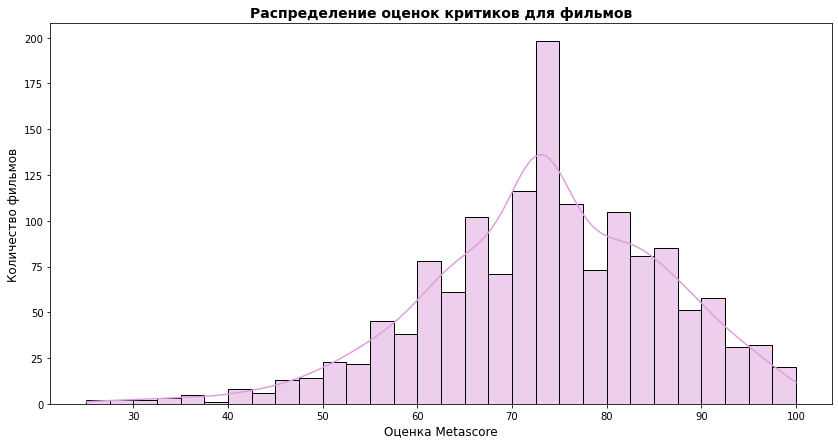

In [42]:
# построение гистограммы распределения для признака "metascore"
plt.figure(figsize = (14, 7))
sns.histplot(x = df.metascore, bins = 30, color = 'plum', kde = True)
plt.title('Распределение оценок критиков для фильмов', fontweight = 'bold', fontsize = 14)
plt.ylabel('Количество фильмов', fontsize = 12)
plt.xlabel('Оценка Metascore', fontsize = 12)
plt.show()

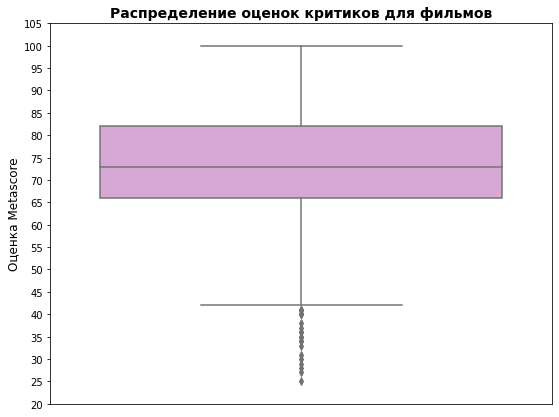

In [43]:
# построение графика "ящик с усами" для признака "metascore"
plt.figure(figsize = (9, 7))
sns.boxplot(y = df.metascore, color = 'plum')
plt.title('Распределение оценок критиков для фильмов', fontweight = 'bold', fontsize = 14)
plt.ylabel('Оценка Metascore', fontsize = 12)
plt.xlabel('')
plt.xticks([])
plt.yticks(list(range(20, 110, 5)))
plt.show()

Получившиеся графики позволяют сделать следующие выводы:
- Наиболее часто встречающиеся оценки находятся в диапазоне 60–85, что может указывать на то, что большинство фильмов в выборке получили средние или выше среднего оценки
- Оценки ниже 43 являются аномальными и встречаются реже, что говорит о том, что фильмы с низкими оценками критиков менее распространены
- Оценки выше 95 могут быть редкими, что указывает на исключительно высокое качество таких фильмов

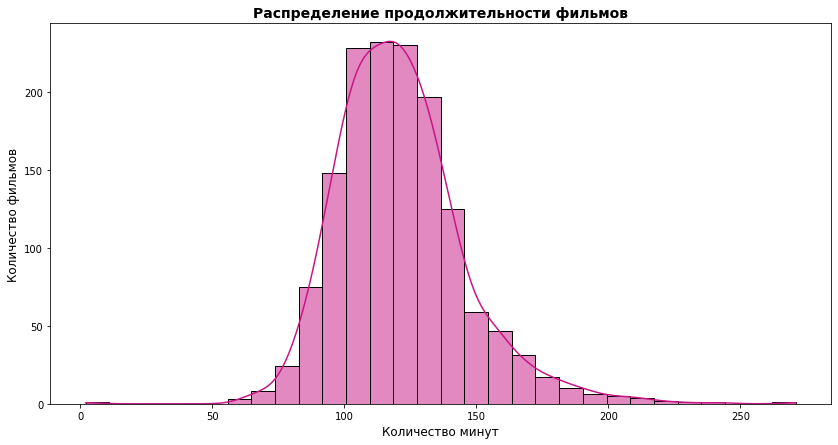

In [44]:
# построение гистограммы распределения для признака "runtime"
plt.figure(figsize = (14, 7))
sns.histplot(x = df.runtime, bins = 30, color = 'mediumvioletred', kde = True)
plt.title('Распределение продолжительности фильмов', fontweight = 'bold', fontsize = 14)
plt.ylabel('Количество фильмов', fontsize = 12)
plt.xlabel('Количество минут', fontsize = 12)
plt.show()

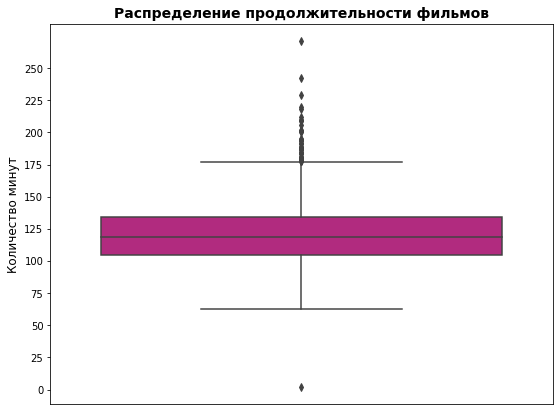

In [45]:
# построение графика "ящик с усами" для признака "runtime"
plt.figure(figsize = (9, 7))
sns.boxplot(y = df.runtime, color = 'mediumvioletred')
plt.title('Распределение продолжительности фильмов', fontweight = 'bold', fontsize = 14)
plt.ylabel('Количество минут', fontsize = 12)
plt.xlabel('')
plt.xticks([])
plt.yticks(list(range(0, 275, 25)))
plt.show()

Получившиеся графики позволяют сделать следующие выводы:
- Наиболее часто встречающаяся продолжительность фильмов находится в диапазоне 75–150 минут, что соответствует стандартной длительности полнометражных фильмов
- Фильмы с продолжительностью менее 75 минут могут быть короткометражными или телевизионными
- Фильмы с продолжительностью более 175 минут могут быть продуктами авторского кинематографа
- В выборке присутствуют фильмы с аномальной длительностью в 2 минуты и в более 175 минут

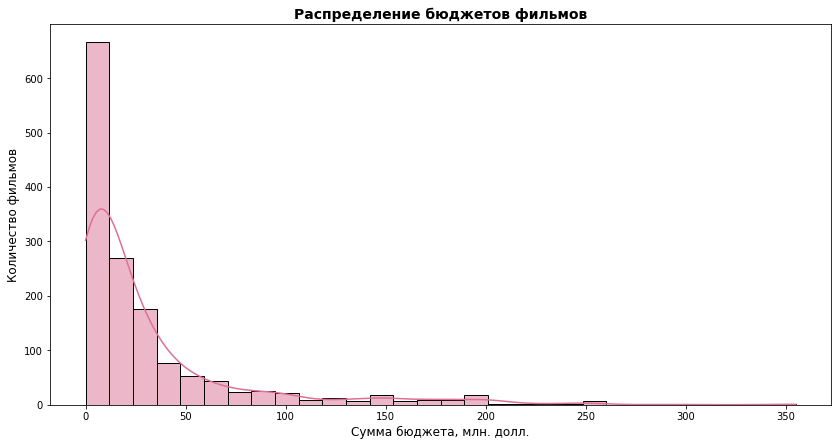

In [46]:
# построение гистограммы распределения для признака "budget"
plt.figure(figsize = (14, 7))
sns.histplot(x = df.budget/1000000, bins = 30, color = 'palevioletred', kde = True)
plt.title('Распределение бюджетов фильмов', fontweight = 'bold', fontsize = 14)
plt.ylabel('Количество фильмов', fontsize = 12)
plt.xlabel('Сумма бюджета, млн. долл.', fontsize = 12)
plt.show()

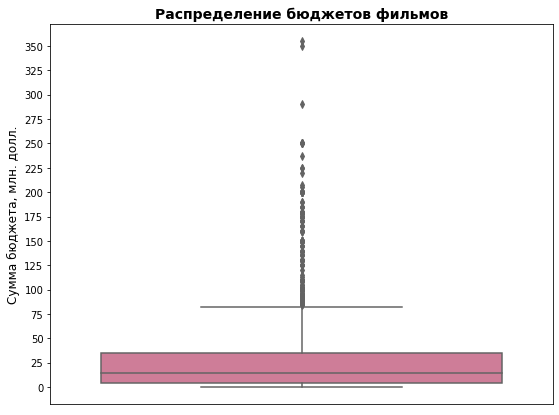

In [47]:
# построение графика "ящик с усами" для признака "budget"
plt.figure(figsize = (9, 7))
sns.boxplot(y = df.budget/1000000, color = 'palevioletred')
plt.title('Распределение бюджетов фильмов', fontweight = 'bold', fontsize = 14)
plt.ylabel('Сумма бюджета, млн. долл.', fontsize = 12)
plt.xlabel('')
plt.xticks([])
plt.yticks(list(range(0, 375, 25)))
plt.show()

Получившиеся графики позволяют сделать следующие выводы:
- Наиболее часто встречающиеся бюджеты находятся в диапазоне 5–20 миллионов долларов, что соответствует среднему бюджету большинства фильмов
- Фильмы с бюджетами менее 5 миллионов долларов могут быть независимыми или низкобюджетными
- Фильмы с бюджетами более 80 миллионов долларов могут быть блокбастерами или высокобюджетными проектами
- Бюджет 75 % фильмов в выборке не превышает 35 млн.долл.

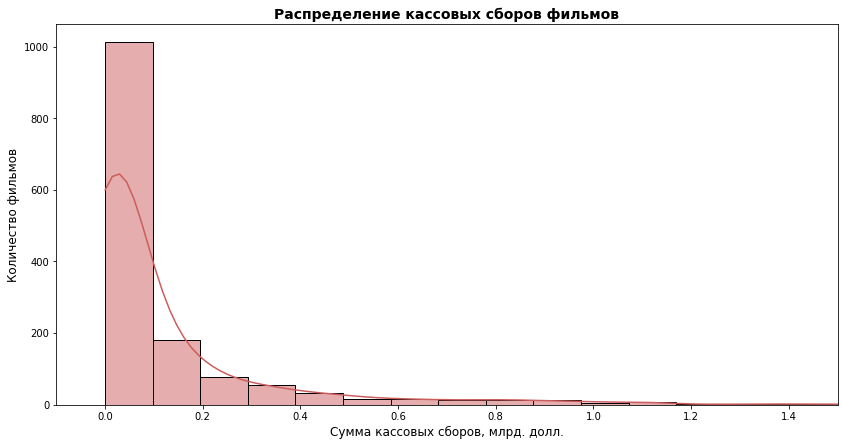

In [125]:
# построение гистограммы распределения для признака "worldwide_gross"
plt.figure(figsize = (14, 7))
sns.histplot(x = df.worldwide_gross/1000000000, bins = 30, color = 'indianred', kde = True)
plt.title('Распределение кассовых сборов фильмов', fontweight = 'bold', fontsize = 14)
plt.ylabel('Количество фильмов', fontsize = 12)
plt.xlabel('Сумма кассовых сборов, млрд. долл.', fontsize = 12)
plt.xlim([-0.1, 1.5])  # опциональное приближение масштаба
plt.show()

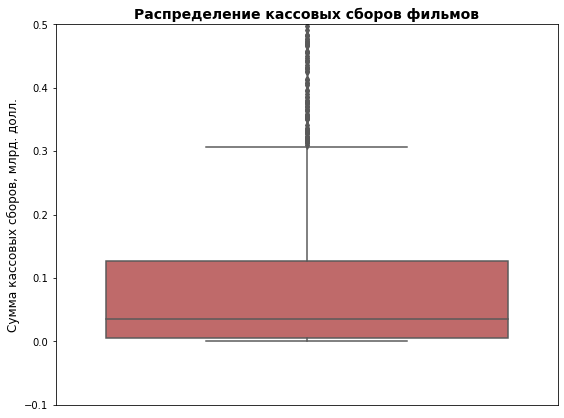

In [128]:
# построение графика "ящик с усами" для признака "worldwide_gross"
plt.figure(figsize = (9, 7))
sns.boxplot(y = df.worldwide_gross/1000000000, color = 'indianred')
plt.title('Распределение кассовых сборов фильмов', fontweight = 'bold', fontsize = 14)
plt.ylabel('Сумма кассовых сборов, млрд. долл.', fontsize = 12)
plt.xlabel('')
plt.xticks([])
plt.ylim([-0.1, 0.5]) # опциональное приближение масштаба
plt.show()

Получившиеся графики позволяют сделать следующие выводы:
- Наиболее часто встречающиеся кассовые сборы находятся в диапазоне 0.01– 0.20 миллиарда долларов (10 - 200 млн. долл)
- Фильмы с кассовыми сборами более 0.3 миллиарда долларов (300 млн.долл) встречаются реже, что может указывать на то, что они являются блокбастерами
- Наличие фильмов с кассовыми сборами около 3.0 миллиардов долларов может указывать на исключительно успешные проекты (отмечено на графиках без приближения)
- Медианный бюджет фильмов в выборке составляет 34 миллиона долларов (вывод на основании графика и описательной статистики)

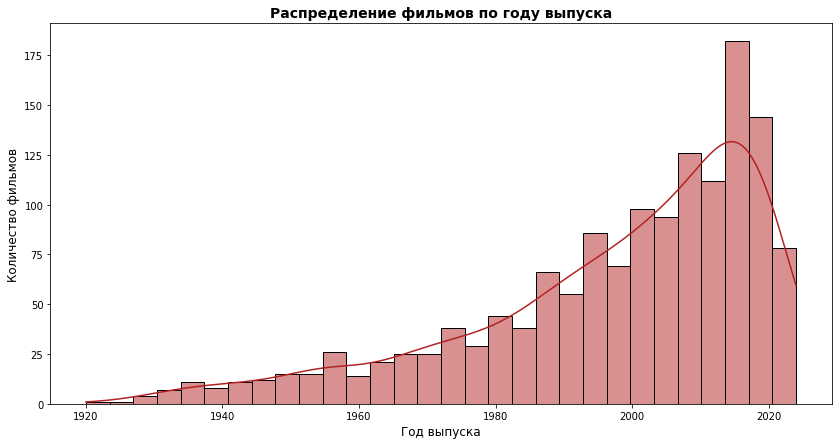

In [50]:
# построение гистограммы распределения для признака "release_year"
plt.figure(figsize = (14, 7))
sns.histplot(x = df.release_year, bins = 30, color = 'firebrick', kde = True)
plt.title('Распределение фильмов по году выпуска', fontweight = 'bold', fontsize = 14)
plt.ylabel('Количество фильмов', fontsize = 12)
plt.xlabel('Год выпуска', fontsize = 12)
plt.show()

Выведенный график позволяет сделать следующие суждения:
 - Большинство фильмов в выборке были сняты в период с 1980 годов по 2020-ые годы, что может быть объяснено техническим развитием отрасли кинопроизводства, ее популяризации и сопутствующим увеличением количества снимаемых фильмов
 - Фильмы, выпущенные до 1960 года, встречаются реже, что может быть связано с техническими ограничениями съемки фильмов: в тот период развитие технологий не позволяло оптимизировать сроки производства кино-картин, да и в целом отрасль только вступала в фазу развития

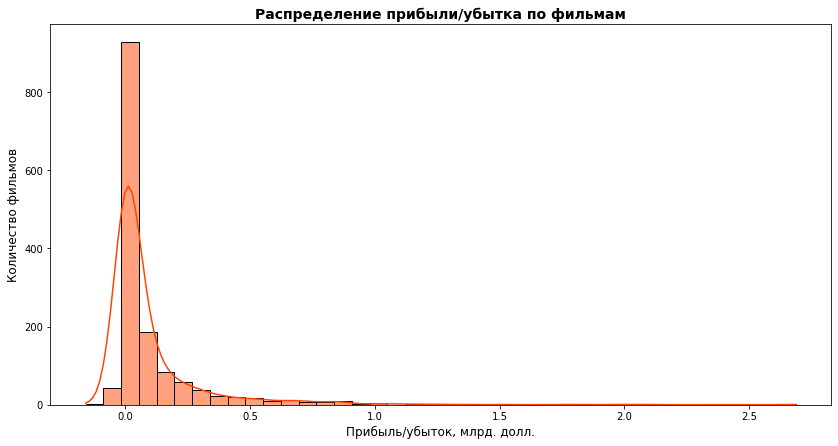

In [129]:
# построение гистограммы распределения для признака "profit_or_loss"
plt.figure(figsize = (14, 7))
sns.histplot(x = df.profit_or_loss/1000000000, bins = 40, color = 'orangered', kde = True)
plt.title('Распределение прибыли/убытка по фильмам', fontweight = 'bold', fontsize = 14)
plt.xlabel('Прибыль/убыток, млрд. долл.', fontsize = 12)
plt.ylabel('Количество фильмов', fontsize = 12)
plt.show()

Выведенный график позволяет сделать следующие суждения:
 - В выборке присутствуют фильмы с неокупившимся бюджетом, однако их меньше, чем фильмов, получившим по итогам выпуска хоть какую-то но прибыль
 - Фильмы с прибылью более 0.5 млрд.долл. (500 млн.долл) редко встречаются в выборке, что говорить об исключительности данных работ и их немногочисленности
 - Прибыль по наиболее успешному фильму в выборке составила более 2.5 млрд. долл.

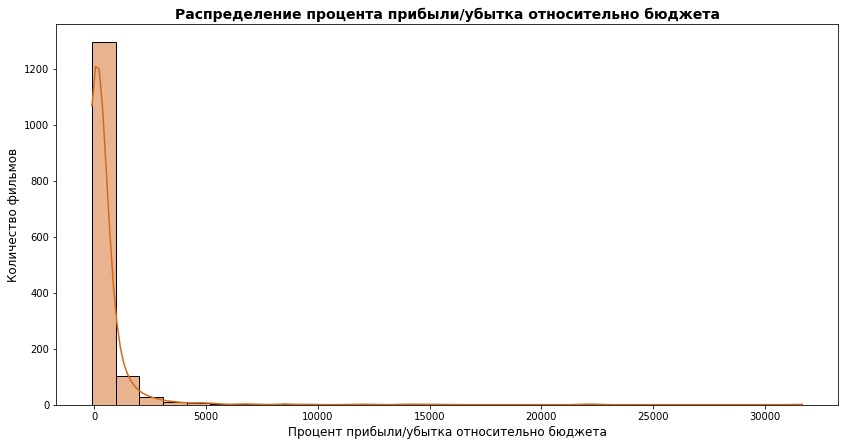

In [122]:
# построение гистограммы распределения для признака "p&l_rate"
plt.figure(figsize = (14, 7))
sns.histplot(x = 'p&l_rate', data = df, bins = 30, color = 'chocolate', kde = True)
plt.title('Распределение процента прибыли/убытка относительно бюджета', fontweight = 'bold', fontsize = 14)
plt.ylabel('Количество фильмов', fontsize = 12)
plt.xlabel('Процент прибыли/убытка относительно бюджета', fontsize = 12)
plt.show()

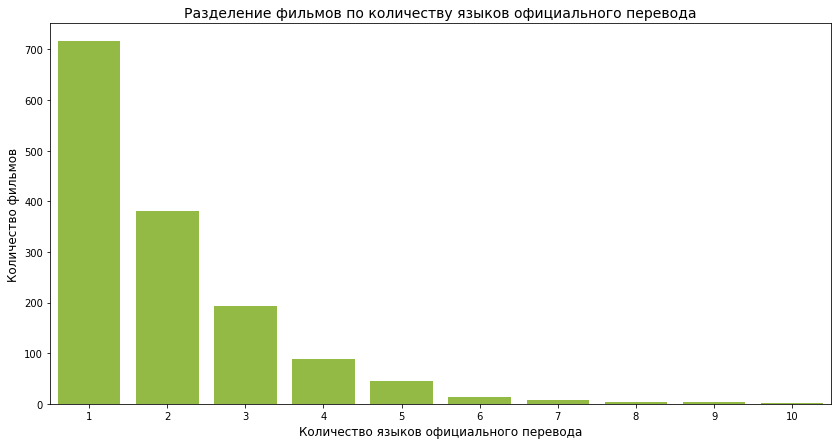

In [53]:
# построение графика "Разделение фильмов по количеству языков официального перевода" для признака 'lang_cnt'
plt.figure(figsize=(14, 7))
sns.countplot(x = 'lang_cnt', data = df, color = 'yellowgreen')
plt.title('Разделение фильмов по количеству языков официального перевода', fontsize = 14)
plt.xlabel('Количество языков официального перевода', fontsize = 12)
plt.ylabel('Количество фильмов', fontsize = 12)
plt.show()

Получившийся график свидетельствует о следующем:
 - Большинство фильмов в выборке снято на 1-2 официальных языках
 - В выборке присутствуют фильмы, снятые на 6-10 языках, однако общее количество подобных фильмов не превышает 50 
 - Максимальное количество языков перевода для фильмов в представленном датасете составляет 10

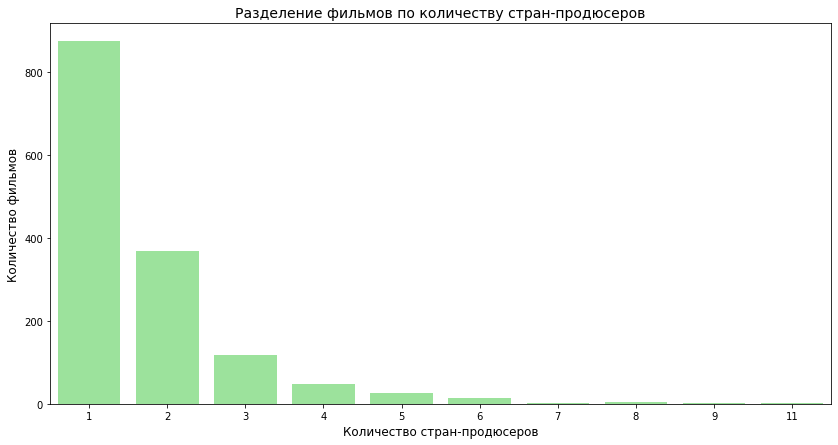

In [54]:
# построение графика "Разделение фильмов по количеству стран-продюсеров" для признака 'country_cnt'
plt.figure(figsize=(14, 7))
sns.countplot(x = 'country_cnt', data = df, color = 'lightgreen')
plt.title('Разделение фильмов по количеству стран-продюсеров', fontsize = 14)
plt.xlabel('Количество стран-продюсеров', fontsize = 12)
plt.ylabel('Количество фильмов', fontsize = 12)
plt.show()

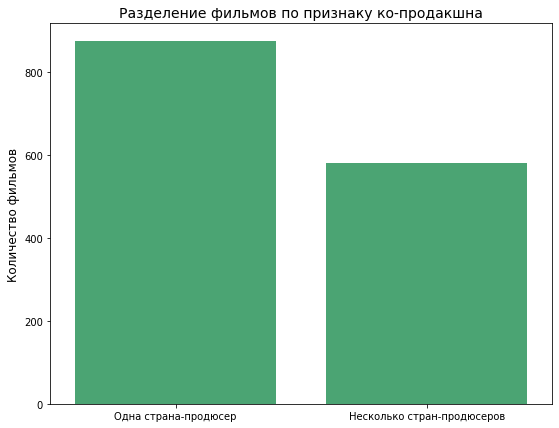

In [55]:
# построение графика "Разделение фильмов по признаку ко-продакшна" 
plt.figure(figsize=(9, 7))
sns.countplot(x = 'coproduction', data = df, color = 'mediumseagreen')
plt.title('Разделение фильмов по признаку ко-продакшна', fontsize = 14)
plt.xlabel('')
plt.ylabel('Количество фильмов', fontsize = 12)
plt.xticks(df.coproduction.unique(), ['Одна страна-продюсер', 'Несколько стран-продюсеров'])
plt.show()

Получившиеся графики свидетельствует о следующем:
 - Более 50 % фильмов в выборке выпущено одной страной-продюсером (кино-командой одной страны)
 - Около 600 фильмов из выборки было снято несколькими странами-продюсерами (кино-командой из нескольких стран)
 - Максимальное количество стран, задействованных в съемке фильма, составляет 11 

In [56]:
# создание функции для обработки полей, содержащих в себе несколько значений признака, перечисленных через запятую. На вход 
# подается строковое название заголовка столбца, а в качестве вывода пользователь получает датафрейм с рассчитанным количеством 
# "встреч" уникального значения по заданному при вызове функции полю-признаку

def group_values(col: str):
    l = []
    for i in df[col]:
        r = list(i.split(','))
        for j in r:
            if j not in l:
                l.append(j.strip())
    unique_values = set(l)
    d = {}
    for i in unique_values:
        cnt = df[col].str.contains(i).astype('int').sum()
        d.update({i : cnt})
    df_for_graph = pd.DataFrame({f'{col}': d.keys(), 'count': d.values()})
    return df_for_graph

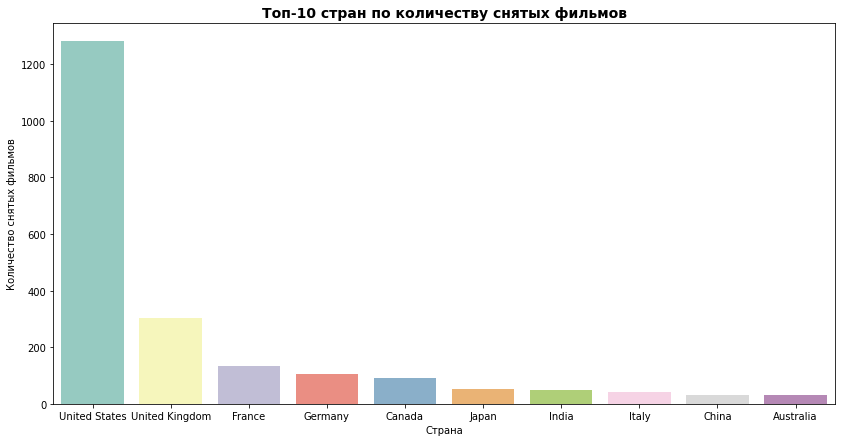

In [57]:
# coздание датафрейма с топ-10 стран по количеству снятых фильмов
cnt_countries = group_values('country_of_origin')
top_10_countries = group_values('country_of_origin').sort_values('count', ascending = False).head(10) 

plt.figure(figsize = (14, 7))
sns.barplot(x = 'country_of_origin', y = 'count', data = top_10_countries, palette = 'Set3')
plt.title('Топ-10 стран по количеству снятых фильмов', fontweight = 'bold', fontsize = 14)
plt.ylabel('Количество снятых фильмов', fontsize = 10)
plt.xlabel('Страна', fontsize = 10)
plt.show()

Полученный график позволяет сделать вывод о том, что большинство рассматриваемых в датасете фильмов было снято в Соединенных Штатах Америки - первой стране по количеству открытых кинопроизводственных компаний. На втором месте располагается Великобритания: причина ее преуспевания в съемке фильмов кроется в активной поддержке, осуществляемой со стороны государства, наличии достаточного количества популярных стриминговых компаний и использовании в производимых фильмах английского языка. Третью строчку занимает Франция с её ориентированностью на разную аудитирую при съемке фильмов и высоким уважением населения к данному виду искусства.

Помимо этих стран в топ-10 стран по количеству снятых фильмов входят Германия, Канада, Япония, Индия, Италия, Китай - крупные европейские и азиатские страны, а также Австралия 

In [58]:
# вывод списка уникальных стран, в которых были сняты рассматриваемые в датфрейме фильмы
np.array(cnt_countries.country_of_origin.to_list())

array(['United States', 'Serbia', 'Switzerland', 'United Arab Emirates',
       'Italy', 'Sweden', 'Yugoslavia', 'Algeria', 'Egypt', 'Mexico',
       'New Zealand', 'Germany', 'Qatar', 'Spain', 'Turkey', 'Romania',
       'Thailand', 'Slovakia', 'France', 'Chile', 'Denmark', 'Gambia',
       'Finland', 'Austria', 'Poland', 'Israel', 'Belgium', 'Latvia',
       'United Kingdom', 'Singapore', 'South Korea', 'West Germany',
       'Bulgaria', 'Ecuador', 'Colombia', 'India',
       'Federal Republic of Yugoslavia', 'Zimbabwe', 'Botswana',
       'Hong Kong', 'Occupied Palestinian Territory', 'Ukraine',
       'Soviet Union', 'Japan', 'South Africa', 'Kazakhstan', 'Cyprus',
       'Czech Republic', 'Canada', 'Norway', 'Australia', 'Brazil',
       'Kenya', 'Jordan', 'Netherlands', 'Argentina', 'Luxembourg',
       'Russia', 'Panama', 'Greece', 'Hungary', 'Bahamas', 'Iceland',
       'Venezuela', 'Malta', 'Morocco', 'Ireland', 'Lebanon', 'China',
       'Iran', 'Taiwan'], dtype='<U30')

Массив является перечислением уникальных стран, в которых были сняты рассматриваемые в датафрейме фильмы. Из необычных стран, представленных в списке, в датафрейме присутствует Гамбия, Эквадор, Венесуэлла, Панама, Лебанон, Кения и Зимбабве.

Также необходимо отметить, что в массиве отсутствуют несуществующие страны (кроме исторических) или повторяющиеся вариации написания одной и той же страны, что свидетельствует о чистоте данных

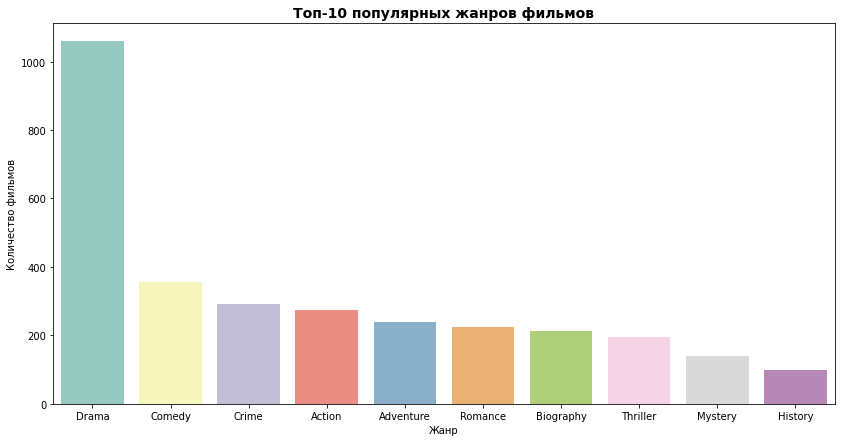

In [59]:
# coздание датафрейма с топ-10 жанров снятых фильмов
cnt_genres = group_values('genre')
top_10_genres = group_values('genre').sort_values('count', ascending = False).head(10) 

plt.figure(figsize = (14, 7))
sns.barplot(x = 'genre', y = 'count', data = top_10_genres, palette = 'Set3')
plt.title('Топ-10 популярных жанров фильмов', fontweight = 'bold', fontsize = 14)
plt.ylabel('Количество фильмов', fontsize = 10)
plt.xlabel('Жанр', fontsize = 10)
plt.show()

Самыми часто встречающимися и в целом любимыми у аудитории жанрами фильмов в представленном датасете стали драма, комедия и детектив. Причиной большого количества снимаемых фильмов в данном жанре является его понятность для массового потребителя и высокая экспрессивность, необходимая для удержания внимания у среднестатистического зрителя.

Наименее популярными из рассматриваемого топа-10 жанров стали мистерия и история: жанр мистерия характеризуется долгой выдержкой идеи фильма, что в эпоху развития дефицита внимания у людей становится главной причиной их недосматриваемости; исторические же фильмы в большинстве случаев являются не такими динамичными, как фильмы в жанре драма и детектив, и отличаются более высоким порогом понимания ввиду необходимости наличия базового понимания исторического контекста

In [60]:
# вывод списка уникальных жанров, к которым относятся рассматриваемые в датфрейме фильмы
np.array(cnt_genres.genre.to_list())

array(['Music', 'Sport', 'Crime', 'Animation', 'Musical', 'Adventure',
       'Action', 'Documentary', 'Mystery', 'Family', 'Short', 'Romance',
       'Horror', 'News', 'Drama', 'History', 'Comedy', 'Thriller',
       'Sci-Fi', 'Fantasy', 'Film-Noir', 'Biography', 'Western', 'War'],
      dtype='<U11')

В выведенном массиве представлено разнообразие жанров представленных в датафрейме фильмов. Необычные из них - жанр "Film-Noir" и 
"War", отведенный в отдельный жанровый раздел.

/opt/tljh/user/lib/python3.7/site-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


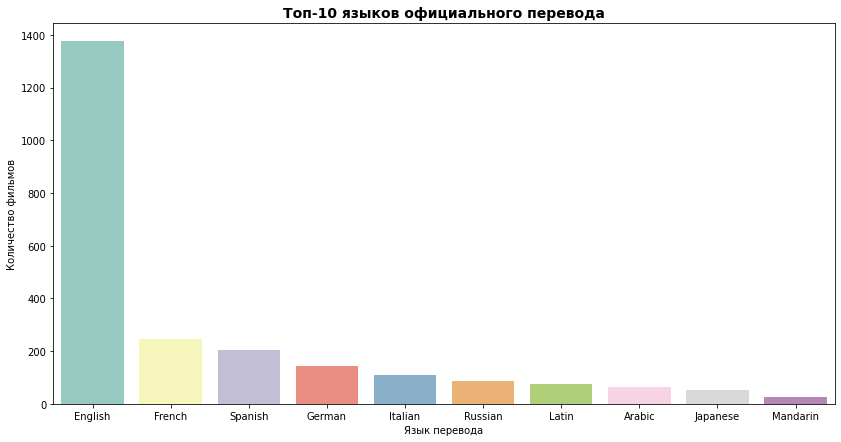

In [63]:
# coздание датафрейма с топ-10 языков официального перевода в снятых фильмах
cnt_lang = group_values('languages')
top_10_lang = group_values('languages').sort_values('count', ascending = False).head(10) 
plt.figure(figsize = (14, 7))
sns.barplot(x = 'languages', y = 'count', data = top_10_lang, palette = 'Set3')
plt.title('Топ-10 языков официального перевода', fontweight = 'bold', fontsize = 14)
plt.ylabel('Количество фильмов', fontsize = 10)
plt.xlabel('Язык перевода', fontsize = 10)
plt.show()

Первое место в десятке самых популярных языков официального перевода для представленных в датасете фильмов занял английский - самый популярный и понятный для мировой аудитории ввиду высокого количества носителей язык. На втором месте оказася французский - официальный язык большого числа международных организаций и второй в мире по популярности иностранный язык. Также в топ-10 языков официального перевода вошли испанский, итальянский, русский, латинский, арабский, японский и язык мандарин - официальный диалект Китая

In [64]:
# вывод списка языков, на которые официально переведены фильмы из датафрейма
np.array(cnt_lang.languages.to_list())

array(['Czech', 'Romanian', 'Lao', 'Malayalam', 'Mongolian', 'None',
       'Tok Pisin', 'Berber languages', 'Cornish', 'Quechua',
       'Old English', 'Corsican', 'Guarani', 'Welsh', 'French', 'Dari',
       'Persian', 'Yoruba', 'Rajasthani', 'Cantonese', 'Polish',
       'Finnish', 'North American Indian', 'Gaelic', 'Bulgarian',
       'Spanish', 'Latvian', 'Sinhala', 'Maori', 'Greenlandic', 'Kannada',
       'Albanian', 'Swiss German', 'Serbo-Croatian', 'Kurdish', 'Hebrew',
       'Arabic', 'Nepali', 'Russian', 'Danish', 'Cheyenne', 'Swahili',
       'Dutch', 'Irish Gaelic', 'Klingon', 'Sotho', 'Sanskrit',
       'Ancient (to 1453)', 'Mende', 'Ukrainian', 'Aboriginal', 'Zulu',
       'Sioux', 'Chechen', 'Amharic', 'Armenian', 'Yiddish', 'Greek',
       'Serbian', 'Norwegian', 'Flemish', 'English', 'Xhosa', 'Pawnee',
       'Navajo', 'Quenya', 'Esperanto', 'Ladakhi', 'Tamil', 'Aramaic',
       'Tagalog', 'Central Khmer', 'Catalan', 'Bengali', 'Hungarian',
       'American Sign Langu

Получившийся массив представляет многообразие уникальных языков, на которых были выпущены представленные в датасете фильмы, среди которых можно обнаружить древние и мало популярные языки, а также различные иностранные диалекты

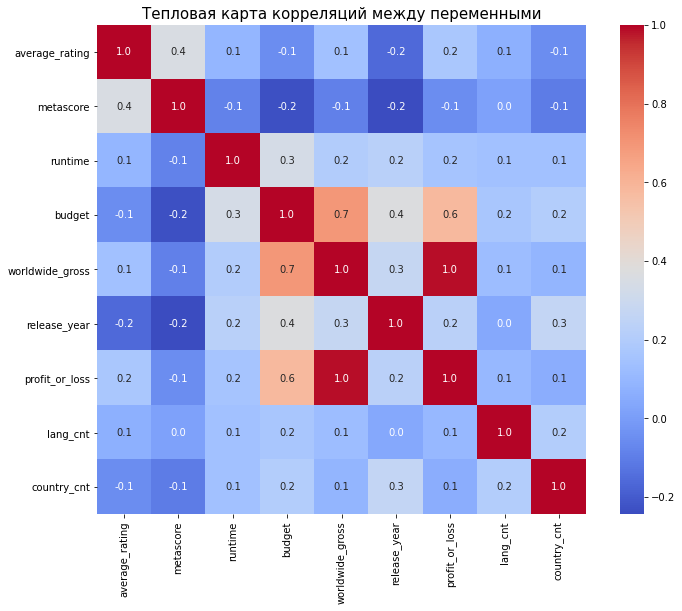

In [114]:
# удаление числовых признаков, рассчитанных на основании иных признаков, неинформативных в целях определения коэффициентов 
# корреляции
int_col.remove('coproduction')
int_col.remove('p&l_rate')

# преобразование датасета путем отсечения выбросов на 5% уровне для наиболее аномальных по значениям признаков - 'budget' и
# 'runtime'
df1 = df.copy()
df1 = df1.reset_index()
mod_df1 = df1[(df1['budget'] <= df1['budget'].quantile(0.95))]
mod_df2 = df1[(df1['runtime'] <= df1['runtime'].quantile(0.95))][['index', 'runtime']]
mod_df = pd.merge(mod_df1, mod_df2, how = 'inner', on = 'index')
mod_df = mod_df.drop(columns = ['runtime_y', 'index']).rename(columns = {'runtime_x': 'runtime'})

# расчет коэффициентов корреляций
correlation_matrix = mod_df[list(int_col)].corr()

# построение тепловой карты корреляций
plt.figure(figsize=(12, 9))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f", square=True)
plt.title('Тепловая карта корреляций между переменными', fontsize=15)
plt.yticks(rotation=0)
plt.show()

Выведенная матрица корреляции позволяет оценить взаимосвязь целевой переменной **"worldwide_gross"** c основными числовыми переменными-признаками и охарактеризовать результаты следующим образом:

**1. Связь с «average_rating»:**
   - Корреляция: 0.1
   - Интерпретация: Слабая положительная корреляция. Это означает, что фильмы с более высоким рейтингом могут иметь немного более высокие кассовые сборы, но связь незначительна.

**2. Связь с «metascore»:**
   - Корреляция: -0.1
   - Интерпретация: Слабая отрицательная корреляция. Это может указывать на то, что оценки критиков практически не влияют на кассовые сборы или даже имеют слабую обратную связь.

**3. Связь с «runtime»:**
   - Корреляция: 0.2
   - Интерпретация: Слабая положительная корреляция. Более длинные фильмы могут иметь немного более высокие кассовые сборы, но связь не очень сильная.

**4. Связь с «budget»:**
   - Корреляция: 0.7
   - Интерпретация: Сильная положительная корреляция. Это указывает на то, что фильмы с более высоким бюджетом, как правило, имеют более высокие кассовые сборы. Это одна из самых сильных связей.

**5. Связь с «release_year»:**
   - Корреляция: 0.3
   - Интерпретация: Умеренная положительная корреляция. Это может означать, что более новые фильмы имеют тенденцию к более высоким кассовым сборам, возможно, из-за инфляции или улучшения маркетинговых стратегий.

**6. Связь с «profit_or_loss»:**
   - Корреляция: 1.0
   - Интерпретация: Совершенная положительная корреляция. Это логично, так как кассовые сборы напрямую влияют на прибыль или убыток. Это самая сильная связь среди всех переменных.

**7. Связь с «lang_cnt»:**
   - Корреляция: 0.1
   - Интерпретация: Слабая положительная корреляция. Это может указывать на то, что фильмы, доступные на большем количестве языков, имеют немного более высокие кассовые сборы, но связь незначительна.

**8. Связь с «country_cnt»:**
   - Корреляция: 0.1
   - Интерпретация: Слабая положительная корреляция. Это может означать, что фильмы, выпущенные в большем количестве стран, имеют немного более высокие кассовые сборы, но связь слабая.

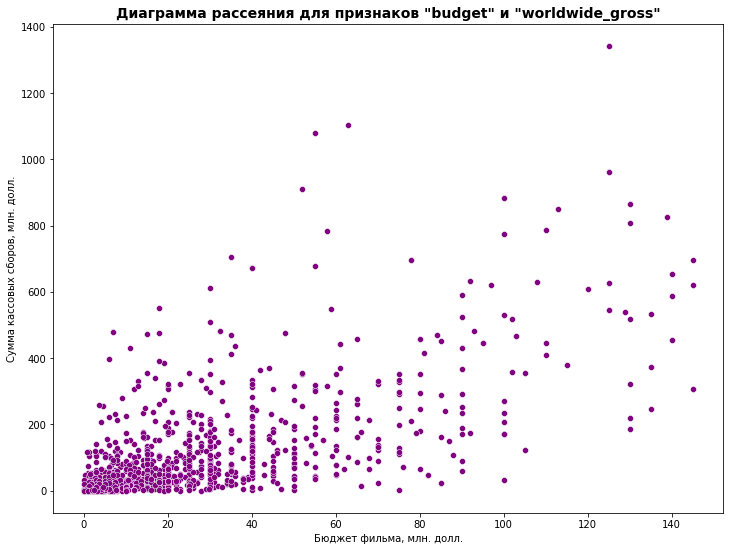

In [141]:
plt.figure(figsize=(12, 9))
sns.scatterplot(x = mod_df.budget/1000000, y = mod_df.worldwide_gross/1000000, color = 'purple')
plt.title('Диаграмма рассеяния для признаков "budget" и "worldwide_gross"', fontweight = 'bold', fontsize = 14)
plt.ylabel('Сумма кассовых сборов, млн. долл.', fontsize = 10)
plt.xlabel('Бюджет фильма, млн. долл.', fontsize = 10)
plt.show()

Выводы, сделанные на основании графика: 
- С увеличением бюджета фильма наблюдается тенденция к увеличению кассовых сборов: это подтверждается тем, что точки в правой верхней части графика (высокий бюджет и высокие кассовые сборы) расположены более высоко относительно нижней левой части графика (низкий бюджет и низкие кассовые сборы)
- Некоторые фильмы с относительно низким бюджетом демонстрируют высокие кассовые сборы. Предположительно, это проекты с уникальной сценаристской идеей, которые непредсказуемо завоевали любовь публики.
- Также есть фильмы с высоким бюджетом, но низкими кассовыми сборами: вероятно, это фильмы, незавоевавшие признания у публики в прокате из-за плохой съемки/неинтересного сюжета/иных технических и креативных качеств фильма
- Большинство точек сосредоточено в области низкого и среднего бюджета (до 50 миллионов долларов) и соответствующих кассовых сборов (до 100 миллионов долларов. Таким образом, наблюдается баланс между суммой бюджета и кассовым сбором

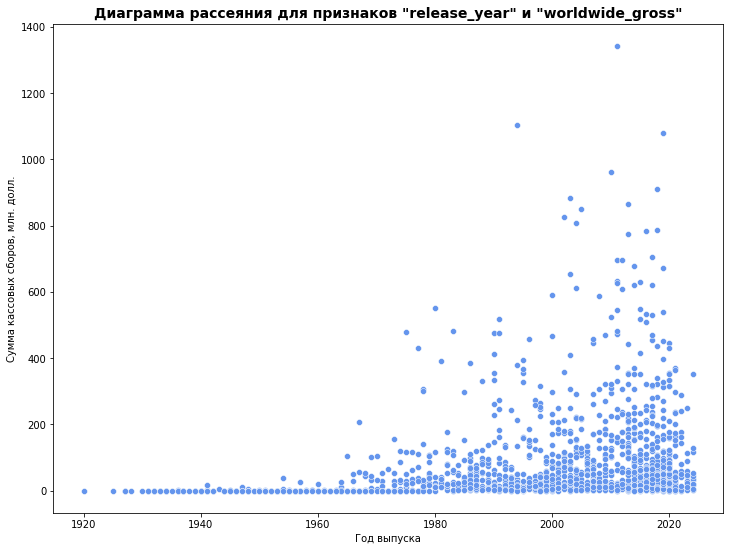

In [138]:
plt.figure(figsize=(12, 9))
sns.scatterplot(x = mod_df.release_year, y = mod_df.worldwide_gross/1000000, color = 'cornflowerblue')
plt.title('Диаграмма рассеяния для признаков "release_year" и "worldwide_gross"', fontweight = 'bold', fontsize = 14)
plt.ylabel('Сумма кассовых сборов, млн. долл.', fontsize = 10)
plt.xlabel('Год выпуска', fontsize = 10)
plt.show()

Выводы, сделанные на основании графика: 
- Общее увеличение кассовых сборов отмечается с началом 1970-ых. Это позволяет предположить, что с увеличением года выпуска увеличивется и сумма кассовых сборов. Причинами такой динамики могут стать следующие факторы:\
1) Становление фильмов более доступными для просмотра зрителями вследствие глобализации\
2) Развитие киноиндустрии в целом\
3) Растущий уровень инфляции
- Некоторые фильмы, выпущенные в более ранние годы (до 1980-х), демонстрируют относительно высокие кассовые сборы. Предположительно, это классические фильмы, которые стали культовыми и продолжают приносить доход
- В более поздние годы (особенно после 2000-х) наблюдается больше фильмов с очень высокими кассовыми сборами (более 1000 миллионов долларов): это могут быть блокбастеры, выпущенные на экраны во многих странах мира

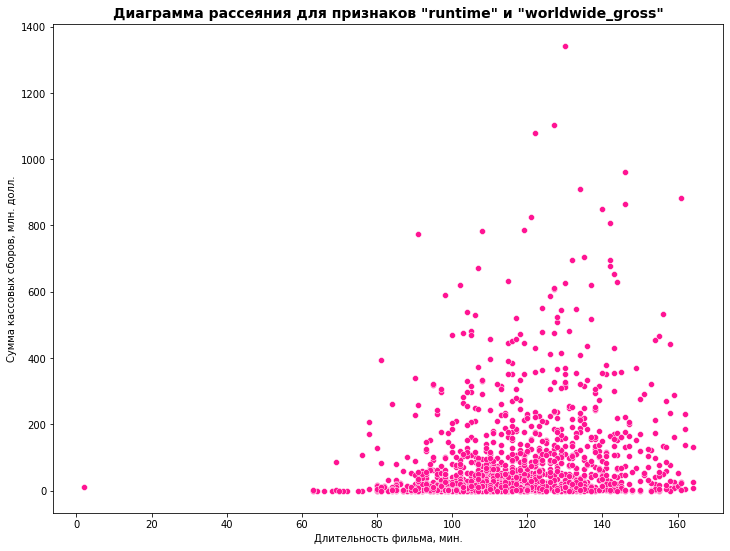

In [139]:
plt.figure(figsize=(12, 9))
sns.scatterplot(x = mod_df.runtime, y = mod_df.worldwide_gross/1000000, color = 'deeppink')
plt.title('Диаграмма рассеяния для признаков "runtime" и "worldwide_gross"', fontweight = 'bold', fontsize = 14)
plt.ylabel('Сумма кассовых сборов, млн. долл.', fontsize = 10)
plt.xlabel('Длительность фильма, мин.', fontsize = 10)
plt.show()

Выводы, сделанные на основании графика: 
- На графике наблюдается слабая положительная корреляция между длительностью фильма и кассовыми сборами. Это означает, что более длинные фильмы могут иметь немного более высокие кассовые сборы.
- На диаграмме присутствуют фильмы с высокой длительн0стью (более 100 минут), которые имеют низкие кассовые сборы: предполагается, что эти фильмы, не смогли привлечь достаточное количество зрителей ввиду технических характеристик
- Большинство точек сосредоточено в области от 80 до 140 минут, что соответствует стандартной длительности полнометражных фильмов
- В этой области также наблюдается наибольший разброс кассовых сборов, что указывает на то, что длительность фильма не является единственным фактором, влияющим на его успех